In [1]:
# This is for some trial-and-error to see what focal lengths we might need

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# si in terms of so and f

def si(so_pass,f_pass):
    
    si_result = np.divide(so_pass,np.subtract(np.divide(so_pass,f_pass),1.))
    
    return si_result

In [3]:
f_array = [12.7, 15., 16., 19., 20., 25.4, 33., 38.1, 40., 50., 
           50.2, 63.5, 75., 75.6, 88.3, 100.]

In [4]:
so_current = 106.7+21.3 # mm

In [5]:
si_current = 137.35-21.3 # mm (approximate)

In [6]:
mag_current = -np.divide(si_current,so_current)

In [8]:
si_array = si(so_pass = so_current, f_pass = f_array)

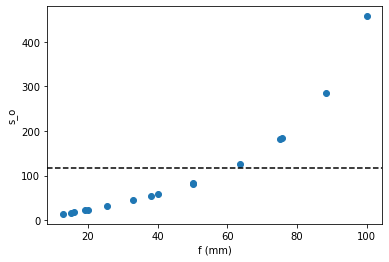

In [9]:
plt.scatter(f_array,si_array)
plt.xlabel("f (mm)")
plt.ylabel("s_o")
plt.axhline(y=116.05, color="k", linestyle="--")
plt.show()

In [10]:
f_ideal = np.interp(x=si_current, xp=si_array, fp=f_array)

In [11]:
print(si_array)

[ 14.09887251  16.99115044  18.28571429  22.31192661  23.7037037
  31.68810916  44.46315789  54.24694105  58.18181818  82.05128205
  82.59125964 126.01550388 181.13207547 184.67175573 284.69521411
 457.14285714]


In [21]:
print(set(zip(f_array,si_array)))

{(20.0, 23.703703703703702), (100.0, 457.1428571428571), (12.7, 14.09887250650477), (33.0, 44.46315789473684), (25.4, 31.688109161793374), (40.0, 58.18181818181818), (75.0, 181.13207547169807), (88.3, 284.69521410579335), (50.2, 82.59125964010283), (19.0, 22.31192660550459), (38.1, 54.24694104560623), (75.6, 184.6717557251908), (63.5, 126.01550387596899), (15.0, 16.991150442477878), (16.0, 18.285714285714285), (50.0, 82.05128205128204)}


In [13]:
# required movement of the detector
# movements of [0,+50] mm *should* be acceptable without requiring movement of the lens itself

resids_detector = np.subtract(si_array,137.35-21.3)

In [26]:
df = pd.DataFrame(f_array, columns=["f"])
df["resids_detector"] = resids_detector

In [32]:
df2 = pd.DataFrame(set(zip(f_array,resids_detector)), 
                   columns=["f","resids_detector"]).sort_values(by="resids_detector")

In [33]:
df2

,f,resids_detector
4,12.7,-101.951127
10,15.0,-99.058850
3,16.0,-97.764286
12,19.0,-93.738073
15,20.0,-92.346296
8,25.4,-84.361891
2,33.0,-71.586842
9,38.1,-61.803059
13,40.0,-57.868182
14,50.0,-33.998718


In [22]:
print(set(zip(f_array,resids_detector)))

{(88.3, 168.64521410579334), (75.6, 68.6217557251908), (33.0, -71.58684210526316), (16.0, -97.7642857142857), (12.7, -101.95112749349522), (63.5, 9.965503875968992), (50.2, -33.45874035989716), (100.0, 341.0928571428571), (25.4, -84.36189083820662), (38.1, -61.80305895439377), (15.0, -99.05884955752212), (75.0, 65.08207547169808), (19.0, -93.73807339449542), (40.0, -57.86818181818182), (50.0, -33.99871794871795), (20.0, -92.34629629629629)}


In [15]:
resids_candidates = np.subtract([82.1, 82.6, ,181.],137.35-21.3)

In [16]:
mag_array = -np.divide(si_array,so_current)

In [17]:
print(mag_array)

[-0.11014744 -0.13274336 -0.14285714 -0.17431193 -0.18518519 -0.24756335
 -0.34736842 -0.42380423 -0.45454545 -0.64102564 -0.64524422 -0.98449612
 -1.41509434 -1.44274809 -2.22418136 -3.57142857]


In [18]:
mag_current

-0.906640625

In [ ]:
## Try test of moving lens and detector both out

In [85]:
del_x_lens = np.linspace(-10., 50., num=16) # displacement of lens

In [86]:
so_test = np.add(del_x_lens,106.7+21.3)

In [87]:
# choice of focal lengths
foc_test = np.linspace(50., 75., num=51)

In [91]:
#abs_mag_max = 0.738
abs_mag_max = 0.906640625

/Users/bandari/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  del sys.path[0]


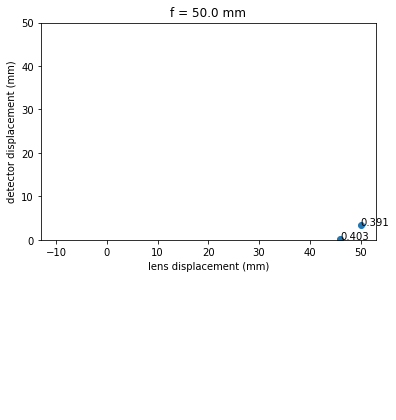

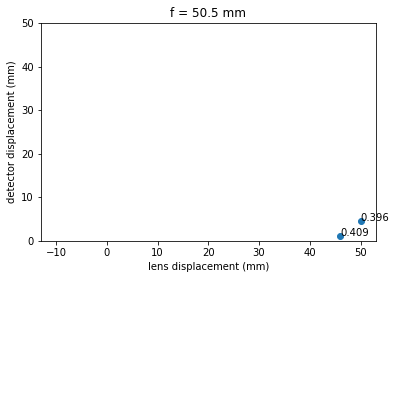

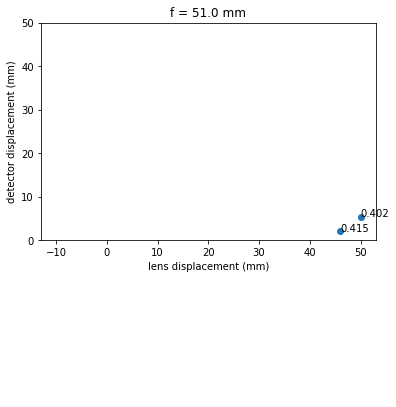

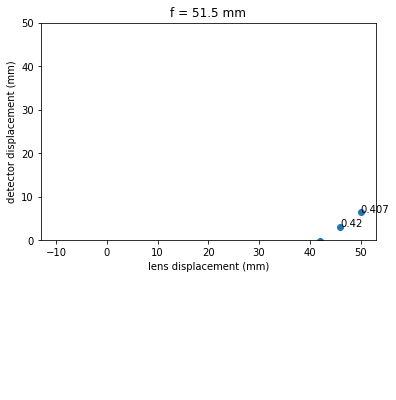

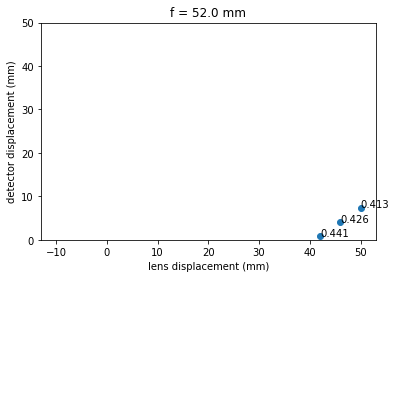

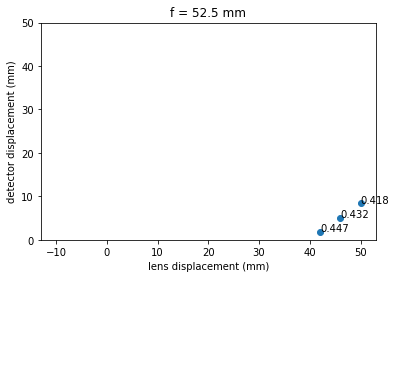

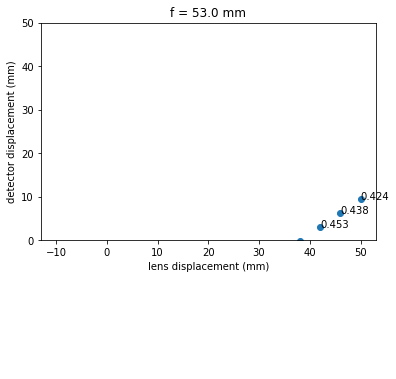

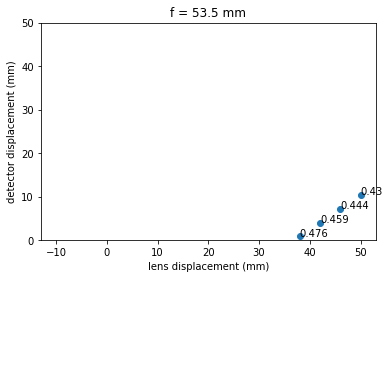

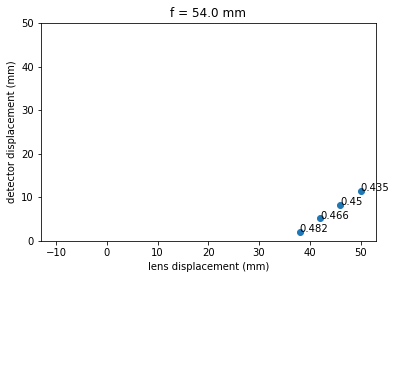

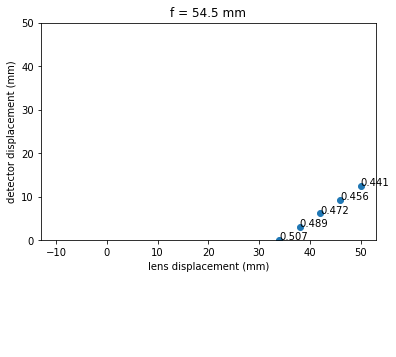

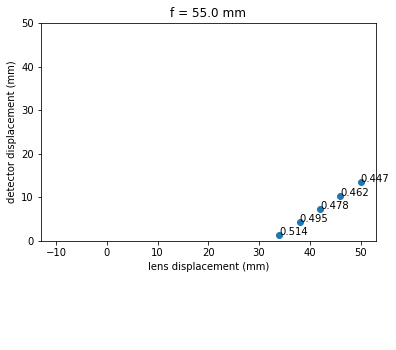

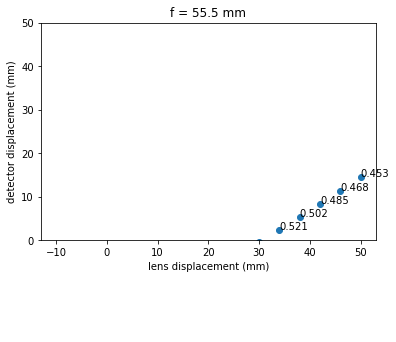

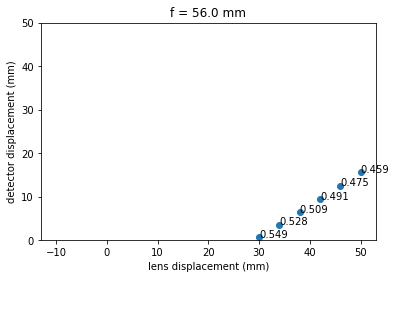

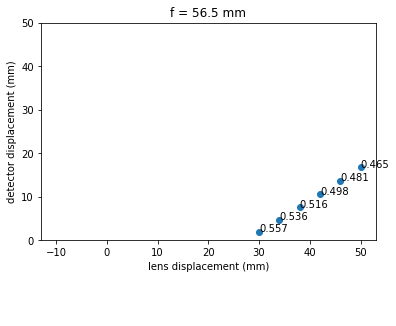

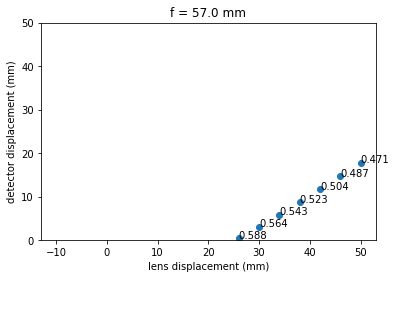

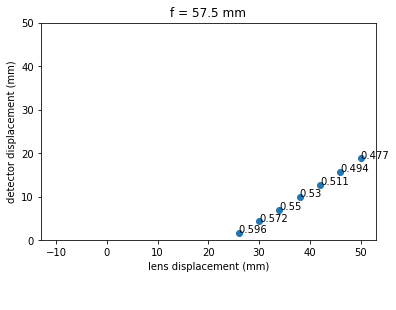

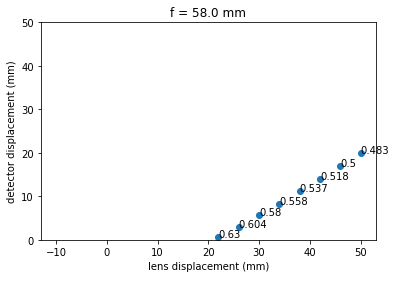

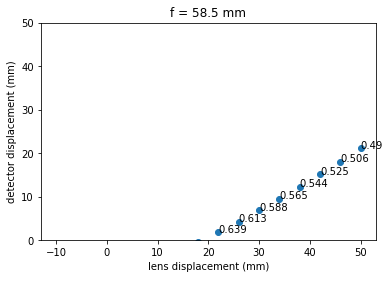

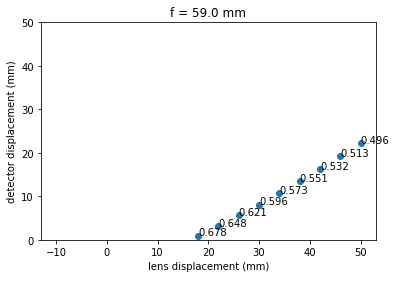

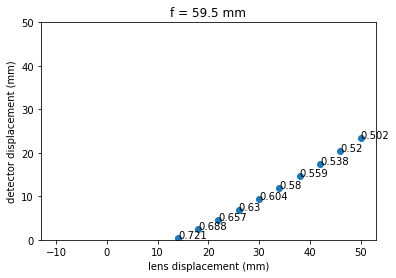

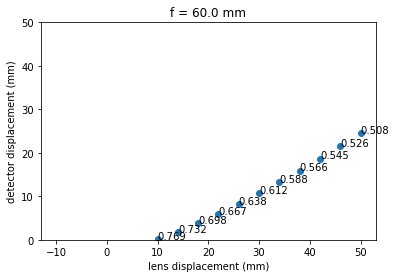

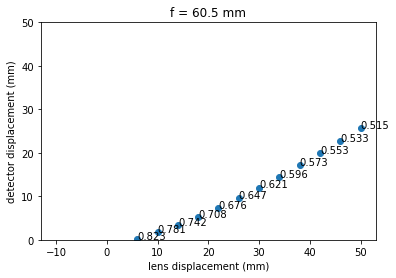

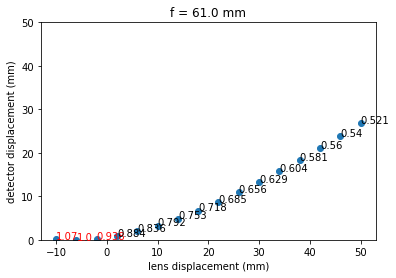

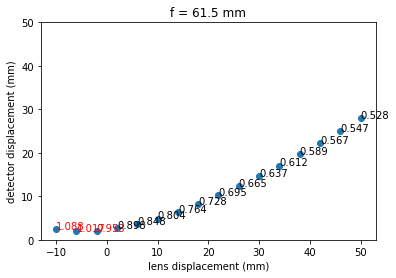

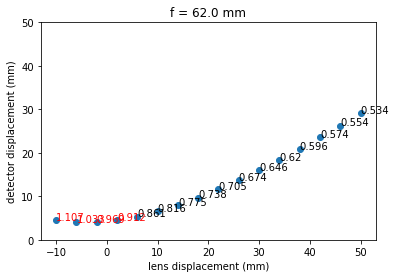

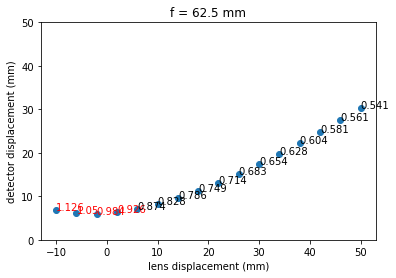

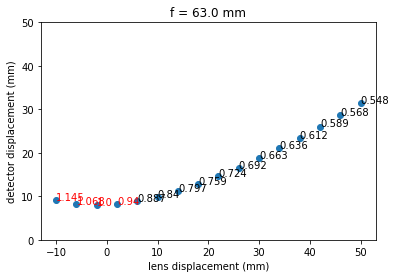

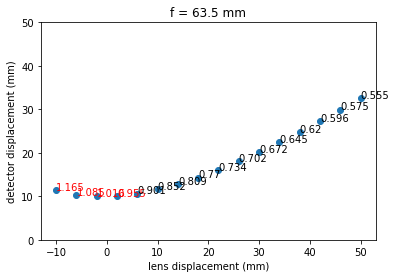

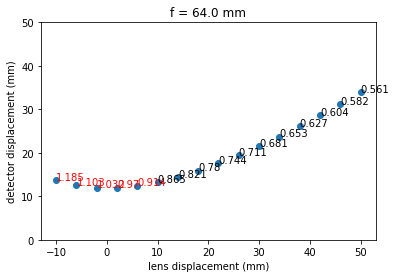

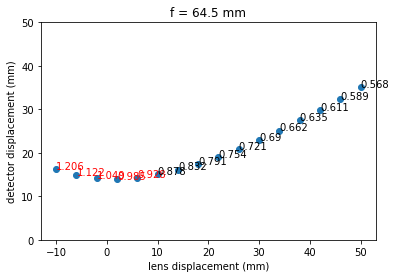

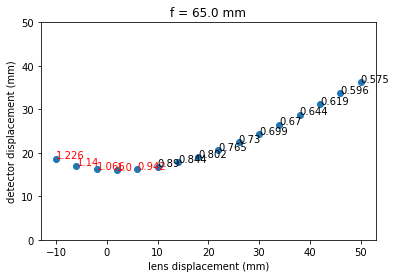

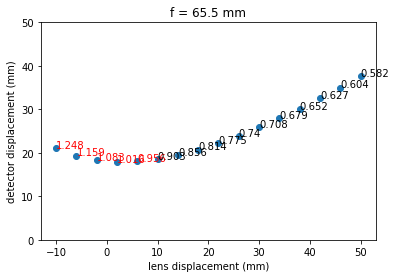

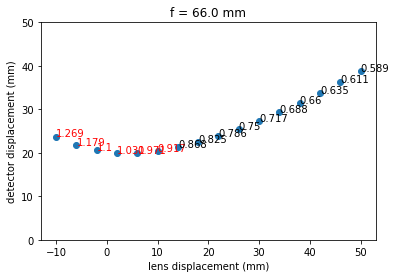

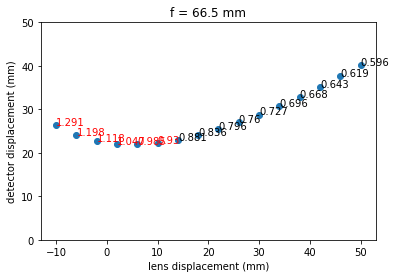

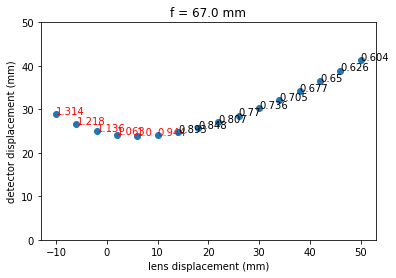

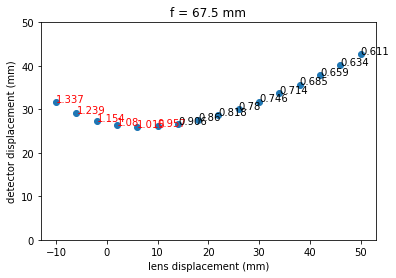

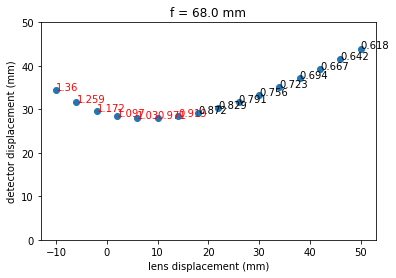

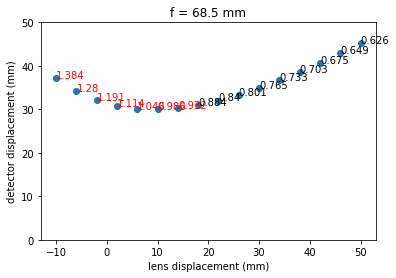

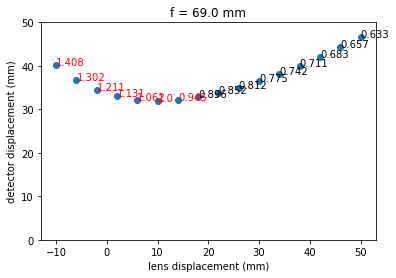

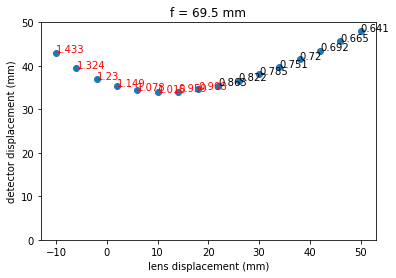

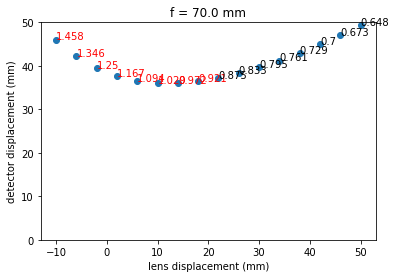

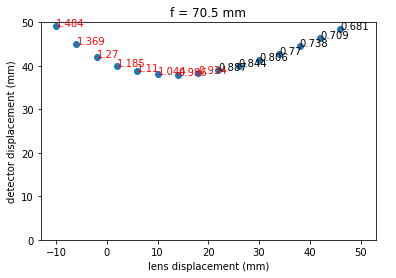

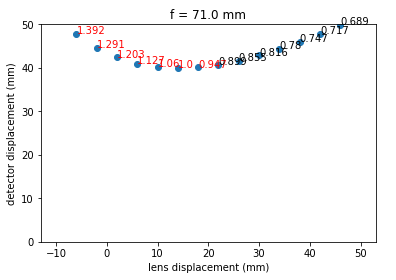

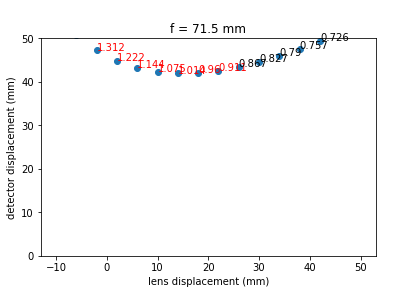

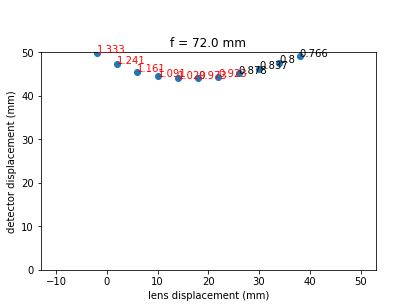

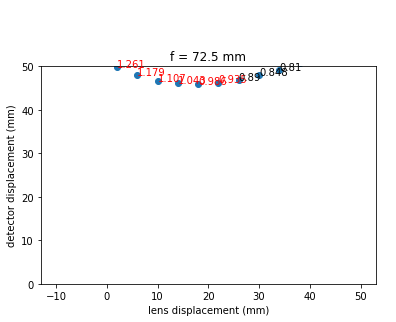

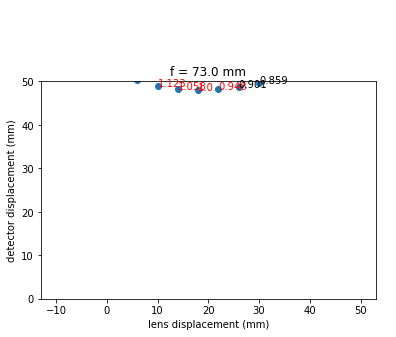

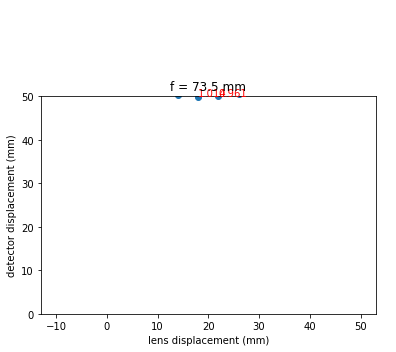

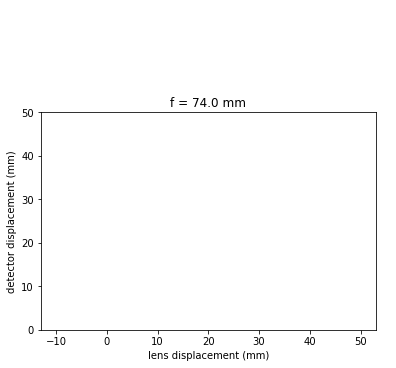

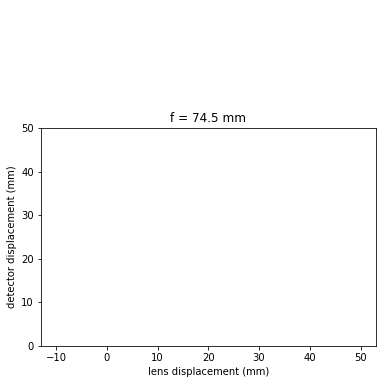

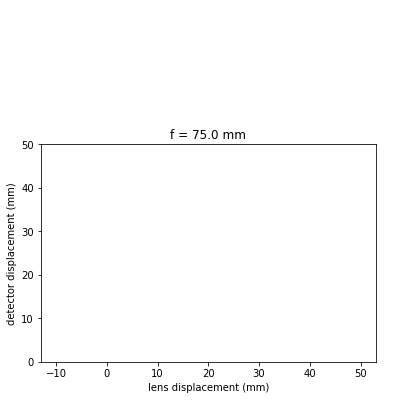

In [92]:
# loop over possible focal lengths
for num_foc in range(0,len(foc_test)):
    
    # find the si array
    si_array = si(so_pass = so_test, f_pass = foc_test[num_foc])
    
    # find needed detector displacement
    disp_detect = np.subtract(np.add(so_test,si_array),128.+116.05)
    
    # find (abs val of) magnifications 
    mag_array = np.divide(si_array,so_test)
    
    fig, ax = plt.subplots()
    for i, txt in enumerate(mag_array):
        if (np.round(txt,3) > abs_mag_max):
            # exceeds limit of magnification
            color_string = "r"
        else:
            color_string = "k"
        ax.annotate(str(np.round(txt,3)), (del_x_lens[i], disp_detect[i]), color=color_string)
    ax.scatter(del_x_lens,disp_detect)
    ax.set_xlabel("lens displacement (mm)")
    ax.set_ylabel("detector displacement (mm)")
    #ax.axhline(y=0, color="k", linestyle="--")
    #ax.fill_between(del_x_lens, -100, 0, color="gray")
    ax.set_ylim([0,50])
    plt.title("f = " + str(foc_test[num_foc]) + " mm")
    
    string_foc = str(foc_test[num_foc]).replace(".","_")
    plt.savefig("figs/" + string_foc + ".png", edgecolor="white")